**01_图像基本操作**

# 图像读取

*   cv2.IMREAD_COLOR: 以彩色模式加载图像，默认
*   cv2.IMREAD_GRAYSCALE: 以灰度图模式加载图像
*   cv2.IMREAD_UNCHANGED: alpha通道的加载图像模式



In [7]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('/content/Cat_image.JPG')

In [55]:
img

array([[[ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214],
        ...,
        [ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214]],

       [[ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214],
        ...,
        [ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214]],

       [[ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214],
        ...,
        [ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214]],

       ...,

       [[ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214],
        ...,
        [ 63,  92, 213],
        [ 63,  92, 213],
        [ 63,  92, 213]],

       [[ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214],
        ...,
        [ 63,  92, 213],
        [ 63,  92, 213],
        [ 63,  92, 213]],

       [[ 57,  94, 214],
        [ 57,  94, 214],
        [ 57,  94, 214],
        ...,
        [ 63,  92, 213],
        [ 63,  92, 213],
        [ 63,  92, 213]]

* 用cv2显示图像

In [ ]:
# 图像的显示，也可以创建多个窗口
cv2.imshow('image',img)   # name, 以及要显示的图片
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destoryAllwindows()

In [ ]:
def cv_show(name, img):
  cv2.imshow(name, img)   
  cv2.waitKey(0)
  cv2.destoryAllwindows()

* 用matplotlib显示图像

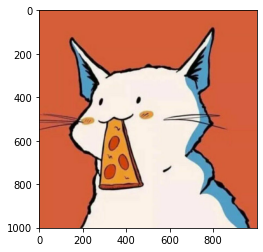

In [56]:
plt.imshow(img[:, :, ::-1])

In [57]:
img.shape, type(img), img.size, img.dtype

((1001, 1000, 3), numpy.ndarray, 3003000, dtype('uint8'))

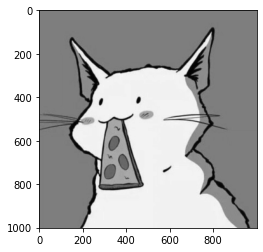

In [58]:
gray_img = cv2.imread('/content/Cat_image.JPG', cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap = 'gray') 

# cmap = 'gray'
# cmap = plt.cm.gray
# cmap = plt.cm.gray_r

* 图像的保存

In [ ]:
cv2.imwrite('mycat', img)  # 文件名, 以及要保存的图像

* 截取部分图像数据

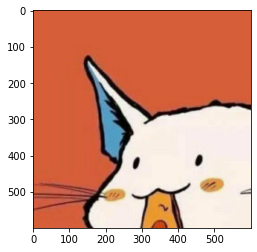

In [50]:
img = cv2.imread('/content/Cat_image.JPG')
cat = img[0:600, 0:600]
plt.imshow(cat[:, :, ::-1])

* 颜色通道提取

In [34]:
b, g, r = cv2.split(img)

In [35]:
b, b.shape

array([[57, 57, 57, ..., 57, 57, 57],
       [57, 57, 57, ..., 57, 57, 57],
       [57, 57, 57, ..., 57, 57, 57],
       ...,
       [57, 57, 57, ..., 63, 63, 63],
       [57, 57, 57, ..., 63, 63, 63],
       [57, 57, 57, ..., 63, 63, 63]], dtype=uint8)

In [37]:
img = cv2.merge((b,g,r))
img.shape

(1001, 1000, 3)

In [ ]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R', cur_img)

In [ ]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G', cur_img)

# 视频读取

* cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0, 1
* 如果是视频文件，直接指定路径即可

In [ ]:
vc = cv2.VideoCapture('test.mp4')

In [ ]:
# 检查是否打开正确
if vc.isOpened():
  oepn, frame = cv.read()   # frame 表示当前帧的图像
else:
  oepn = False
while oepn = True:
  ret, frame = vc.read()
  if frame is None:
    break
  if ret == True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RAY)
    cv2.imshow('result', gray)
    if cv2.waitKey(1) & 0xFF = 27:   # 按 esc 键退出
      break
vc.release()
cv2.destroyAllWindows()

# 边界填充

*  BORDER_REPLICATE: 复制法，复制最边缘像素
*  BORDER_REFLECT: 反射法，对感兴趣的图像中的像素在两边进行复制，e.g. dcba｜abcd｜dcba
*  BORDER_REFLECT101: 反射法，也就是以最边缘像素为轴，e.g. dcb｜abcd｜cba
*  BORDER_WRAP: 外包装法， e.g. abcd｜abcd｜abcd
*  BORDER_CONSTANT: 常量法，常数值填充 

In [61]:
top_size, bottom_size, left_size, right_size = [50, 50, 50, 50]
img = cv2.imread('/content/Cat_image.JPG')

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT, value = 0)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f749aa2c310>,
 Text(0.5, 1.0, 'CONSTANT'))

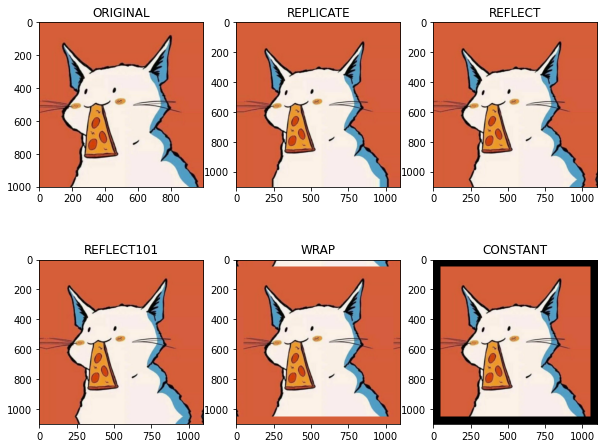

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(231), plt.imshow(img[:, :, ::-1]), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate[:, :, ::-1]), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect[:, :, ::-1]), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101[:, :, ::-1]), plt.title('REFLECT101')
plt.subplot(235), plt.imshow(wrap[:, :, ::-1]), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant[:, :, ::-1]), plt.title('CONSTANT')

# 数值计算

In [69]:
cat = cv2.imread('/content/Cat_image.JPG')

cat2 = cat + 10 # 广播机制

In [74]:
cat[0:5,:,0]

array([[57, 57, 57, ..., 57, 57, 57],
       [57, 57, 57, ..., 57, 57, 57],
       [57, 57, 57, ..., 57, 57, 57],
       [57, 57, 57, ..., 57, 57, 57],
       [57, 57, 57, ..., 57, 57, 57]], dtype=uint8)

In [75]:
cat2[0:5,:,0]

array([[67, 67, 67, ..., 67, 67, 67],
       [67, 67, 67, ..., 67, 67, 67],
       [67, 67, 67, ..., 67, 67, 67],
       [67, 67, 67, ..., 67, 67, 67],
       [67, 67, 67, ..., 67, 67, 67]], dtype=uint8)

In [77]:
# 相当于 % 256（取余）
(4 * cat2)[0:5,:,0]

array([[12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8)

In [78]:
cv2.add(cat, cat2)[0:5, :, 0]

array([[124, 124, 124, ..., 124, 124, 124],
       [124, 124, 124, ..., 124, 124, 124],
       [124, 124, 124, ..., 124, 124, 124],
       [124, 124, 124, ..., 124, 124, 124],
       [124, 124, 124, ..., 124, 124, 124]], dtype=uint8)

* 图像融合

In [8]:
cat = cv2.imread('/content/Cat_image.JPG')
dog = cv2.imread('/content/Dog_image.JPG')

cat.shape, dog.shape

((1001, 1000, 3), (1024, 1024, 3))

In [9]:
dog = cv2.resize(dog, (1000, 1001))

dog.shape

(1001, 1000, 3)

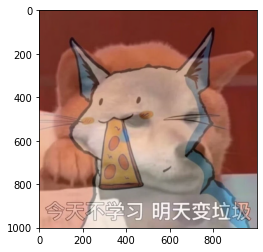

In [15]:
res = cv2.addWeighted(cat, 0.4, dog, 0.6, 0)
plt.imshow(res[:,:,::-1])

* 关于cv2.resize

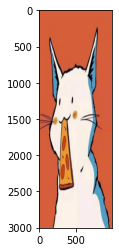

In [14]:
res = cv2.resize(cat, (0,0), fx=1, fy=3)
plt.imshow(res[:,:,::-1])

# 图像阈值

**ret, dst = cv2.threshold(src, thresh, maxval, type)**

* src: 输入图，只能输入单通道图像，通常为灰度图
* ret: 返回阈值
* dst: 输出图
* thresh: 阈值
* maxval: 当像素值超过了阈值（或者小于阈值， 根据type来决定），所赋予的值
* type: 二值化操作的类型
  1. cv2.THRESH_BINARY 超过阈值部分取maxval，否则为0
  2. cv2.THRESH_BINARY_INV 上者的反转
  3. cv2.THRESH_TRUNC 大于阈值部分设为阈值，否者不变
  4. cv2.THRESH_TOZERO 大于阈值部分不改变，否则为0
  5. cv2.THRESH_TOZERO_INV 上者的反转

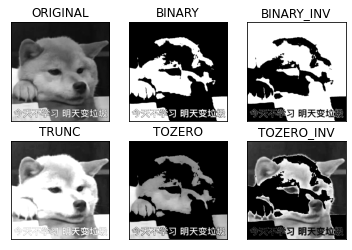

In [21]:
img_gray = cv2.imread('/content/Dog_image.JPG', cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['ORIGINAL', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], cmap = 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])